<a href="https://colab.research.google.com/github/fabiobento/dnn-course-2024-1/blob/main/00_course_folder/cert_prof_time_series/class_04/TS%20-%20W4%20-%2009%20-%20Manchas%20Solares%20com%20DNN%20(Laborat%C3%B3rio%202).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

adaptado de [Certificado Profissional Desenvolvedor do TensorFlow](https://www.coursera.org/professional-certificates/tensorflow-in-practice) de [Laurence Moroney](https://laurencemoroney.com/)

# Previsão de manchas solares com redes neurais (somente DNN)

Nos laboratórios restantes sobre séries temporais, você deixará de lado as séries temporais sintéticas e começará a criar modelos para dados do mundo real.

Em particular, você treinará no conjunto de dados [Sunspots](https://www.kaggle.com/datasets/robervalt/sunspots):
* um registro mensal do número de manchas solares de janeiro de 1749 a julho de 2018.

Primeiro, você criará uma rede neural profunda composta de camadas densas. Isso servirá como linha de base para que você possa compará-la com o próximo laboratório, no qual você usará uma arquitetura mais complexa.

Vamos começar!

## Importações
Você usará as mesmas importações de antes, com a adição do módulo [csv](https://docs.python.org/3/library/csv.html).

Você precisará dele para analisar o arquivo CSV que contém o conjunto de dados.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

2024-04-13 20:25:04.732159: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-13 20:25:04.756433: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 20:25:04.756460: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 20:25:04.756477: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-13 20:25:04.761236: I tensorflow/core/platform/cpu_feature_g

In [2]:
# Baixar arquivos adicionais para o laboratório
!wget https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/cert_prof_time_series/class_04/Sunspots.csv
!unzip -n -q Sunspots.csv

--2024-04-13 20:25:05--  https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/cert_prof_time_series/class_04/Sunspots.csv
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fabiobento/dnn-course-2024-1/main/00_course_folder/cert_prof_time_series/class_04/Sunspots.csv [following]
--2024-04-13 20:25:06--  https://raw.githubusercontent.com/fabiobento/dnn-course-2024-1/main/00_course_folder/cert_prof_time_series/class_04/Sunspots.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [text/plain]
Saving to: ‘Sunspots.csv.1’

Sunspots.csv.1      100%[===================>]

## Utilitários

Você só terá o conjunto de dados `plot_series()` aqui porque não precisa mais das funções de geração de dados sintéticos.

In [3]:
def plot_series(x, y, format="-", start=0, end=None,
                title=None, xlabel=None, ylabel=None, legend=None ):
    """
    Visualiza dados de séries temporais

    Args:
      x (array of int) - contém valores para o eixo x
      y (matriz de int ou tupla de matrizes) - contém os valores para o eixo y
      format (string) - estilo de linha ao plotar o gráfico
      label (string) - etiqueta para a linha
      start (int) - primeiro passo de tempo a ser plotado
      end (int) - último passo de tempo a ser plotado
      title (string) - título do gráfico
      xlabel (string) - rótulo do eixo x
      ylabel (string) - rótulo do eixo y
      legend (lista de strings) - legenda para o gráfico
    """

    # Configurar as dimensões da figura do gráfico
    plt.figure(figsize=(10, 6))

  # Verificar se há mais de duas séries para plotar
    if type(y) is tuple:

      # Fazer um loop sobre os elementos y
      for y_curr in y:

        # Plote os valores x e y atuais
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plote os valores x e y
      plt.plot(x[start:end], y[start:end], format)

    # Rotular o eixo x
    plt.xlabel(xlabel)

    # Rotular o eixo y
    plt.ylabel(ylabel)

    # Definir a legenda
    if legend:
      plt.legend(legend)

    # Definir o título
    plt.title(title)

    # Sobrepor uma grade no gráfico
    plt.grid(True)

    # Desenhe o gráfico na tela
    plt.show()

## Download e visualização do conjunto de dados

Agora você pode fazer o download do conjunto de dados e inspecionar o conteúdo.

O link na aula é do meu repositório, mas o Google hospeda o link abaixo.

In [4]:
# Baixar o conjunto de dados
!wget https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv

--2024-04-13 20:25:06--  https://storage.googleapis.com/tensorflow-1-public/course4/Sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.78.251, 142.250.79.59, 142.251.135.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.78.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70827 (69K) [text/csv]
Saving to: ‘Sunspots.csv.2’

Sunspots.csv.2      100%[===================>]  69.17K  --.-KB/s    in 0.05s   

2024-04-13 20:25:07 (1.47 MB/s) - ‘Sunspots.csv.2’ saved [70827/70827]



Executando a célula abaixo, você verá que há apenas três colunas no conjunto de dados:
1. coluna sem título contendo o número do mês
2. Data que tem o formato `YYYY-MM-DD`
3. Número médio total de manchas solares

In [5]:
# Visualizar o conjunto de dados
!head Sunspots.csv

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
5,1749-06-30,139.2
6,1749-07-31,158.0
7,1749-08-31,110.5
8,1749-09-30,126.5


Para este laboratório e o próximo, você precisará apenas do número do mês e do número total médio de manchas solares. Você carregará esses dados na memória e os converterá em matrizes que representam uma série temporal.

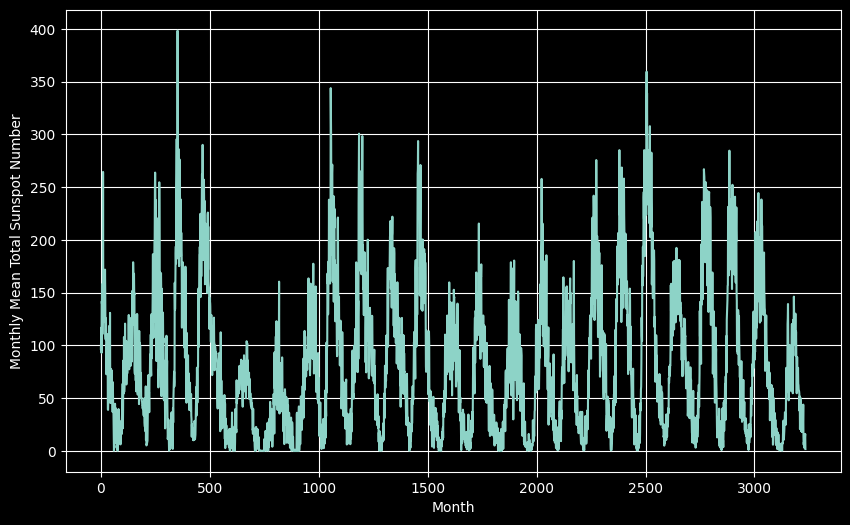

In [6]:
# Inicializar listas
time_step = []
sunspots = []

# Abrir arquivo CSV
with open('./Sunspots.csv') as csvfile:

  # Inicializar o leitor
  reader = csv.reader(csvfile, delimiter=',')

  # Pular a primeira linha
  next(reader)

  # Acrescente o número da linha e de sunspot  às listas
  for row in reader:
    time_step.append(int(row[0]))
    sunspots.append(float(row[2]))

# Converter listas em matrizes numéricas
time = np.array(time_step)
series = np.array(sunspots)

# Visualizar os dados
plot_series(time, series, xlabel='Month', ylabel='Monthly Mean Total Sunspot Number')

## Dividir o conjunto de dados

Em seguida, você dividirá o conjunto de dados em conjuntos de treinamento e validação.

Há 3.235 pontos no conjunto de dados e você usará os primeiros 3.000 para treinamento.

In [7]:
# Definir o tempo de divisão
split_time = 3000

# Obter o conjunto de trens
time_train = time[:split_time]
x_train = series[:split_time]

# Obter o conjunto de validação
time_valid = time[split_time:]
x_valid = series[split_time:]

## Preparar recursos e rótulos

Em seguida, você pode preparar as janelas do conjunto de dados como antes.

O tamanho da janela é definido como 30 pontos (igual a 2,5 anos), mas fique à vontade para alterá-lo posteriormente se quiser fazer experiências.

In [8]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    """Gera janelas de conjunto de dados

    Args:
      series (matriz de float) - contém os valores da série temporal
      window_size (int) - o número de etapas de tempo a serem incluídas no recurso
      batch_size (int) - o tamanho do lote
      shuffle_buffer(int) - tamanho do buffer a ser usado para o método shuffle

    Retorna:
      dataset (TF Dataset) - Conjunto de dados TF contendo janelas de tempo
    """

    # Gerar um conjunto de dados TF a partir dos valores da série
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Janela de dados, mas só pega aqueles com o tamanho especificado
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)

    # Achatar as janelas, colocando seus elementos em um único lote
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Criar tuplas com recursos e rótulos
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

     # Embaralhar as janelas
    dataset = dataset.shuffle(shuffle_buffer)

    # Criar lotes de janelas
    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

In [9]:
# Hiperpârametros
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

# Gerar as janelas do conjunto de dados
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

2024-04-13 20:25:07.735063: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-13 20:25:07.738867: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-13 20:25:07.739140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Construir o modelo

O modelo será uma rede densa de 3 camadas, conforme mostrado abaixo.

In [10]:
# Construir o modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Imprimir o resumo do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1251 (4.89 KB)
Trainable params: 1251 (4.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Ajuste a taxa de aprendizado

Você pode escolher uma taxa de aprendizagem executando o mesmo código de agendamento de taxa de aprendizagem dos laboratórios anteriores.

In [11]:
# Definir o agendador de taxa de aprendizado
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Inicializar o otimizador
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Definir os parâmetros de treinamento
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Treinar o modelo
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
      1/Unknown - 1s 993ms/step - loss: 31.6149

2024-04-13 20:25:08.784275: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7cfecc007e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-13 20:25:08.784294: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 SUPER, Compute Capability 7.5
2024-04-13 20:25:08.789274: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-04-13 20:25:08.823349: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


93/93 [==============================] - 1s 1ms/step - loss: 32.8813 - lr: 1.0000e-08
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 32.8088 - lr: 1.1220e-08
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 32.7285 - lr: 1.2589e-08
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 32.6414 - lr: 1.4125e-08
Epoch 5/100
93/93 [==============================] - 0s 1ms/step - loss: 32.5477 - lr: 1.5849e-08
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 32.4471 - lr: 1.7783e-08
Epoch 7/100
93/93 [==============================] - 0s 1ms/step - loss: 32.3397 - lr: 1.9953e-08
Epoch 8/100
93/93 [==============================] - 0s 1ms/step - loss: 32.2264 - lr: 2.2387e-08
Epoch 9/100
93/93 [==============================] - 0s 1ms/step - loss: 32.1072 - lr: 2.5119e-08
Epoch 10/100
93/93 [==============================] - 0s 2ms/step - loss: 31.9772 - lr: 2.8184e-08
Epoch 11/100
93/93 [===========

(1e-08, 0.001, 0.0, 100.0)

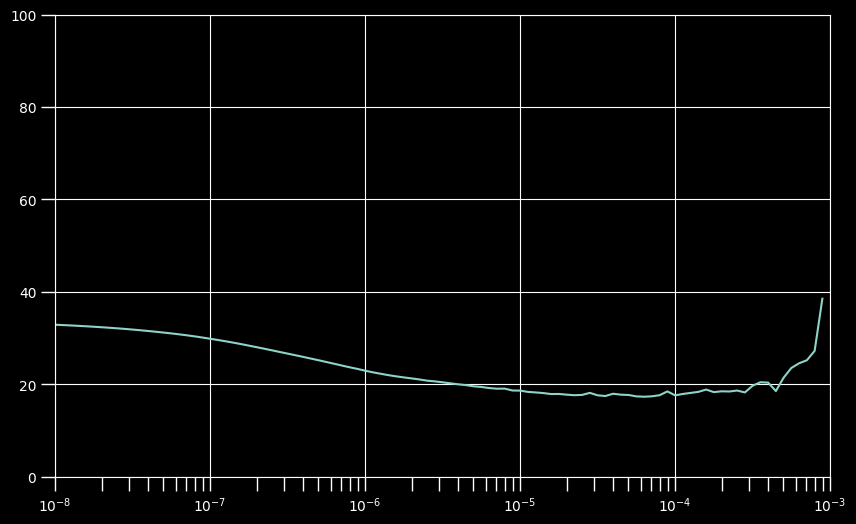

In [12]:
# Definir a matriz de taxa de aprendizado
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Definir a grade
plt.grid(True)

# Plotar a perda em escala logarítmica
plt.semilogx(lrs, history.history["loss"])

# Aumentar o tamanho dos tickmarks
plt.tick_params('both', length=10, width=1, which='both')

# Definir os limites do gráfico
plt.axis([1e-8, 1e-3, 0, 100])

## Treinar o modelo

Depois de escolher uma taxa de aprendizado, você pode reconstruir o modelo e iniciar o treinamento.

In [13]:
# Redefinir estados gerados pelo Keras
tf.keras.backend.clear_session()

# Criar o modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [14]:
# Definir a taxa de aprendizado
learning_rate = 2e-5

# Definir o otimizador
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Definir os parâmetros de treinamento
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Treinar o modelo
history = model.fit(train_set,epochs=100)

Epoch 1/100
93/93 [==============================] - 0s 1ms/step - loss: 26.7331 - mae: 27.2273
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 19.9274 - mae: 20.4196
Epoch 3/100


2024-04-13 20:25:27.368827: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11402223086486091842
2024-04-13 20:25:27.368877: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 16520596228657427140


93/93 [==============================] - 0s 1ms/step - loss: 18.8855 - mae: 19.3765
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 18.5025 - mae: 18.9957
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 18.4763 - mae: 18.9683
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 18.0362 - mae: 18.5278
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 17.6863 - mae: 18.1771
Epoch 8/100
93/93 [==============================] - 0s 2ms/step - loss: 17.6686 - mae: 18.1612
Epoch 9/100
93/93 [==============================] - 0s 1ms/step - loss: 17.5690 - mae: 18.0615
Epoch 10/100
93/93 [==============================] - 0s 1ms/step - loss: 17.5860 - mae: 18.0781
Epoch 11/100
93/93 [==============================] - 0s 1ms/step - loss: 17.3220 - mae: 17.8139
Epoch 12/100
93/93 [==============================] - 0s 2ms/step - loss: 17.1640 - mae: 17.6581
Epoch 13/100
93/93 [=============================

## Previsão do modelo

Agora veja se o modelo gera bons resultados. Se você usou os parâmetros padrão deste notebook, deverá ver que as previsões seguem a forma do ground-truth com um MAE de cerca de 15.

In [15]:
def model_forecast(model, series, window_size, batch_size):
    """Usa um modelo de entrada para gerar previsões em janelas de dados

    Args:
      model (TF Keras Model) - modelo que aceita janelas de dados
      series (array of float) - contém os valores da série temporal
      window_size (int) - o número de etapas de tempo a serem incluídas na janela
      batch_size (int) - o tamanho do lote

    Retorna:
      forecast (matriz numpy) - matriz que contém as previsões
    """

    # Gerar um conjunto de dados TF a partir dos valores da série
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Janela de dados, mas só pega aqueles com o tamanho especificado
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Achatar as janelas, colocando seus elementos em um único loteh
    dataset = dataset.flat_map(lambda w: w.batch(window_size))

    # Criar lotes de janelas
    dataset = dataset.batch(batch_size).prefetch(1)

    # Obter previsões em todo o conjunto de dados
    forecast = model.predict(dataset)

    return forecast

8/8 [==============================] - 0s 2ms/step


2024-04-13 20:25:45.503993: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 10053901849874786904


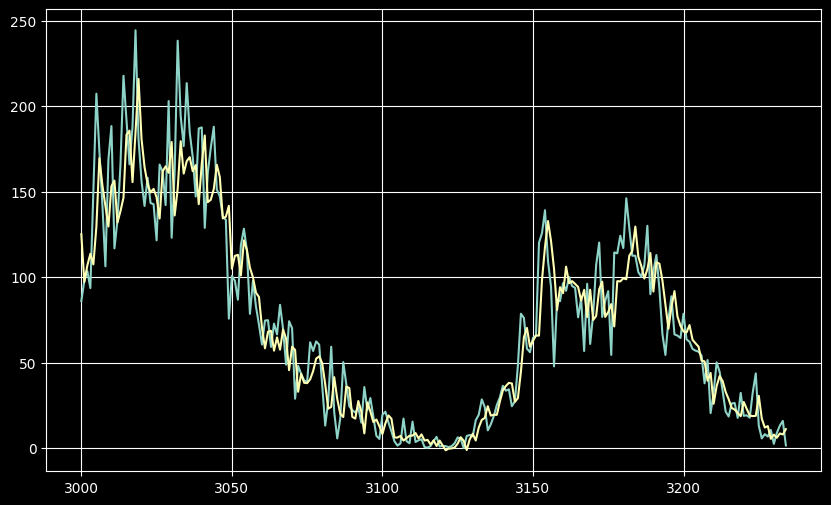

In [16]:
# Reduzir a série original
forecast_series = series[split_time-window_size:-1]

# Use a função auxiliar para gerar previsões
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Soltar eixo unidimensional
results = forecast.squeeze()

# Plotar os resultados
plot_series(time_valid, (x_valid, results))

In [17]:
# Calcular o MAE
print(tf.keras.metrics.mean_absolute_error(x_valid, results).numpy())

14.714858


## Resumo

Neste laboratório, você criou uma DNN relativamente simples para prever o número de manchas solares em um determinado mês.

Recomendamos que você ajuste os parâmetros ou treine por mais tempo e veja os melhores resultados que pode obter.

No próximo laboratório, você criará um modelo mais complexo e avaliará se a complexidade adicional se traduz em resultados melhores ou piores.